# Prosper Loan Data Exploration
## By King Solomon Otoo

# Preliminary Wrangling
TThis data set contains information on peer to peer loans facilitated by credit company Prosper. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

### Gathering and Assessing Data

In [2]:
# Loading the dataset
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# displaying basic information about the data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# checking for null values
loan_df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [5]:
# checking for duplicates
loan_df.duplicated().sum()

0

In [6]:
# displaying basic summary statistics
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
# displaying all columns of the dataset
loan_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### choosing the columns or variables of interest

In [8]:
# list containin column names of interest
subloandf_cols =  ['BorrowerRate', 'Term', 'Recommendations', 'ProsperRating (Alpha)', 'TotalProsperLoans', 'EmploymentStatus', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'ListingCategory (numeric)',
    'LoanOriginationDate','LoanStatus', 'Investors']

In [9]:
# dataframe containing only the columns of interest
subloandf = loan_df[subloandf_cols]

In [10]:
# displaying first five of the sub data
subloandf.head()

,BorrowerRate,Term,Recommendations,ProsperRating (Alpha),TotalProsperLoans,EmploymentStatus,StatedMonthlyIncome,LoanOriginalAmount,ListingCategory (numeric),LoanOriginationDate,LoanStatus,Investors
0,0.1580,36,0,NaN,NaN,Self-employed,3083.333333,9425,0,2007-09-12 00:00:00,Completed,258
1,0.0920,36,0,A,NaN,Employed,6125.000000,10000,2,2014-03-03 00:00:00,Current,1
2,0.2750,36,0,NaN,NaN,Not available,2083.333333,3001,0,2007-01-17 00:00:00,Completed,41
3,0.0974,36,0,A,NaN,Employed,2875.000000,10000,16,2012-11-01 00:00:00,Current,158
4,0.2085,36,0,D,1.0,Employed,9583.333333,15000,2,2013-09-20 00:00:00,Current,20


In [11]:
# displaying basic information of the dataframe of interest
subloandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BorrowerRate               113937 non-null  float64
 1   Term                       113937 non-null  int64  
 2   Recommendations            113937 non-null  int64  
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   TotalProsperLoans          22085 non-null   float64
 5   EmploymentStatus           111682 non-null  object 
 6   StatedMonthlyIncome        113937 non-null  float64
 7   LoanOriginalAmount         113937 non-null  int64  
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   LoanOriginationDate        113937 non-null  object 
 10  LoanStatus                 113937 non-null  object 
 11  Investors                  113937 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 10.4+ MB


### Cleaning Data

In [12]:
# formatting the 'LoanOriginationDate' column to proper date format
subloandf['LoanOriginationDate'] = pd.to_datetime(subloandf['LoanOriginationDate'])

In [13]:
subloandf= subloandf.dropna(subset=['ProsperRating (Alpha)'])

In [14]:
#  resetting the dataframe
subloandf = subloandf.reset_index()

In [15]:
# filling all null values inthe 'TotalProsperLoans' columnn with zeros 
subloandf['TotalProsperLoans'] = subloandf['TotalProsperLoans'].fillna(0)

In [16]:
subloandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   BorrowerRate               84853 non-null  float64       
 2   Term                       84853 non-null  int64         
 3   Recommendations            84853 non-null  int64         
 4   ProsperRating (Alpha)      84853 non-null  object        
 5   TotalProsperLoans          84853 non-null  float64       
 6   EmploymentStatus           84853 non-null  object        
 7   StatedMonthlyIncome        84853 non-null  float64       
 8   LoanOriginalAmount         84853 non-null  int64         
 9   ListingCategory (numeric)  84853 non-null  int64         
 10  LoanOriginationDate        84853 non-null  datetime64[ns]
 11  LoanStatus                 84853 non-null  object        
 12  Inve

### Creating a new `LoanStatus` variable

Feature engineering new dataframe with new `Loanstatus` 

In [17]:
# choosing values which are defaulted or completed  
comp_or_def = (subloandf['LoanStatus'] == 'Completed') | (subloandf['LoanStatus'] == 'Defaulted') | (subloandf['LoanStatus'] == 'Chargedoff')

comp_or_def

0        False
1        False
2        False
3        False
4        False
         ...  
84848    False
84849    False
84850    False
84851     True
84852    False
Name: LoanStatus, Length: 84853, dtype: bool

In [18]:
# creating the datafrane which the conditon
defaulted_df = subloandf[comp_or_def]

In [19]:
def defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
defaulted_df['LoanStatus'] = defaulted_df.apply(defaulted, axis=1)

In [20]:
defaulted_df.head()

,index,BorrowerRate,Term,Recommendations,ProsperRating (Alpha),TotalProsperLoans,EmploymentStatus,StatedMonthlyIncome,LoanOriginalAmount,ListingCategory (numeric),LoanOriginationDate,LoanStatus,Investors
12,15,0.3177,36,0,HR,0.0,Other,5500.000000,4000,13,2012-04-19,Defaulted,10
18,23,0.2419,36,0,D,0.0,Employed,2500.000000,2000,15,2013-04-26,Defaulted,30
21,26,0.2809,60,0,E,0.0,Employed,3885.916667,4000,1,2013-02-21,Completed,37
22,27,0.0920,36,0,A,0.0,Full-time,6666.666667,4000,1,2010-06-24,Completed,121
25,30,0.0999,36,0,A,0.0,Employed,3750.000000,10000,20,2012-02-07,Completed,30


In [21]:
# counting the values for completed and defaulted
defaulted_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

### What is the structure of your dataset?
The original dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


Derived features/variables to assist exploration and analysis:
- the Dataframe `subloandf` with contain only the variables or columns of interest.
- the Dataframe `defaulted_df` which has new `LoanStatus` varaible consisting of defaulted or completed status only.



### What is/are the main feature(s) of interest in your dataset?
the `LoanStatus` is main feature of interest since it was used to identify defaulted or completed loan status. Also the other features like the `EmploymentStatus`, `ProsperCreditRating` and `LoanAmount`.

I'm most interested in exploring the`LoanStatus` , `EmploymentStatus`, `ProsperCreditRating` and `LoanAmount` occurrance patterns, along with how these variables relates or affects each other. Sample questions to answer: how many borrowers has completed or defaulted?, which employment status occurs acquires the most loans?.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The borrower`ProsperCreditRating` Prosper rating will have the biggest influence on the likehood of default. Also I expect that loan amount will play a key impact and maybe the category of credit.

## Univariate Exploration

### Exploring the `LoanStatus` variable

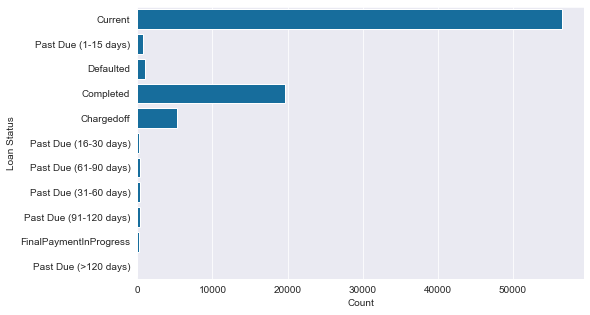

In [22]:
# increasing the chart
plt.rcParams['figure.figsize'] = 8, 5
# setting the color using the colorblind palette
base_color = sb.color_palette('colorblind')[0]
# changin the chart background color
sb.set_style('darkgrid')

# plotting the chart in horizontal bars 
sb.countplot(data = subloandf, y = 'LoanStatus', color = base_color);
#changing the labe of the x and y axis
plt.xlabel('Count');
plt.ylabel('Loan Status');

Observations
- current loans make up the majority of the loans in the data set.
- Based on the length of the payment delay, past-due loans are divided into a number of groups.
- Completed loans make up another significant portion; defaulted loans make up the minority, although charged-off loans also make up a sizeable portion.

### Exploring the `LoanStatus` in the defaulted dataframe

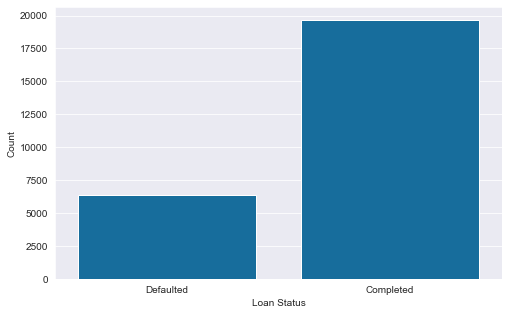

In [23]:
sb.countplot(data=defaulted_df, x='LoanStatus', color=base_color);
plt.xlabel('Loan Status');
plt.ylabel('Count');

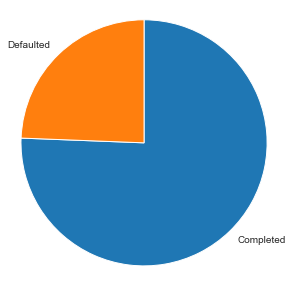

In [37]:
sorted_counts = defaulted_df['LoanStatus'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

Observations
- Most loan status were the completed loan status.

### Exploring the  `Employment Status`

Question:
- Which `EmploymentStatus` was counted the most?

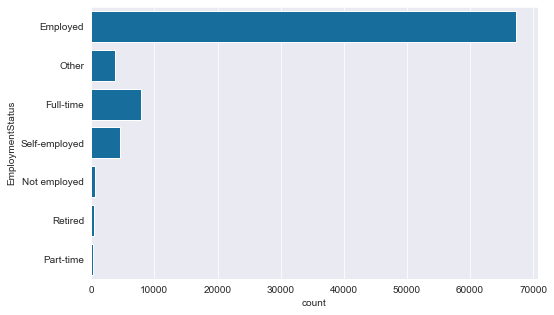

In [24]:
sb.countplot(data = subloandf, y = 'EmploymentStatus', color = base_color);

Observations
- Most borrowers have the employed status and all other categories as small part of borrowers. 
- Full time is next highest, after that self empolyed and so on.

### Exploring the `StatedMonthlyIncome`

Question:
- what is the distribution of the `StatedMonthlyIncome` variable?

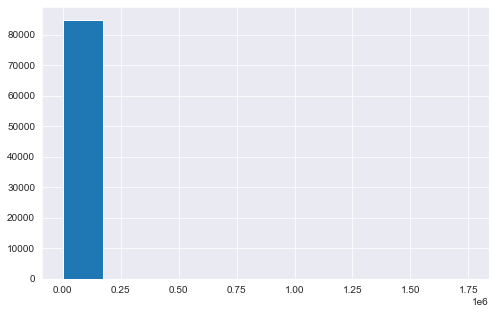

In [25]:
plt.hist(data=subloandf, x='StatedMonthlyIncome');

Observation:
- Not much can be told from this chart so I zoom in to get a closer picture of what the distribution is like. 

In [26]:
# diplaying summary statistics of the 'StatedMonthlyIncome' 
subloandf['StatedMonthlyIncome'].describe()

count    8.485300e+04
mean     5.931175e+03
std      8.239944e+03
min      0.000000e+00
25%      3.434000e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [27]:
# creating a limit using the means and standard deviaions 
income_mean = subloandf.StatedMonthlyIncome.mean()
income_std = subloandf.StatedMonthlyIncome.std()
limit = income_mean+income_std 

After Zooming

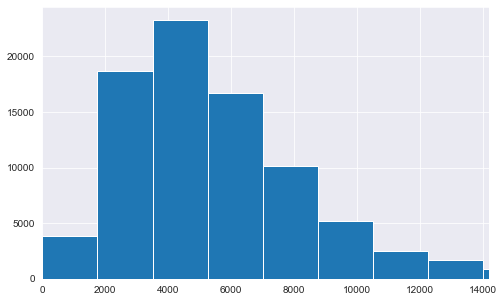

In [28]:
plt.hist(data=subloandf, x='StatedMonthlyIncome', bins=1000);
# setting x-axis limit with the limit created
plt.xlim(0, limit);

- Stated monthly income still has noticeable right skew but now we can see that mode is about 5000.  

### Exploring the `BorrowerRate` 

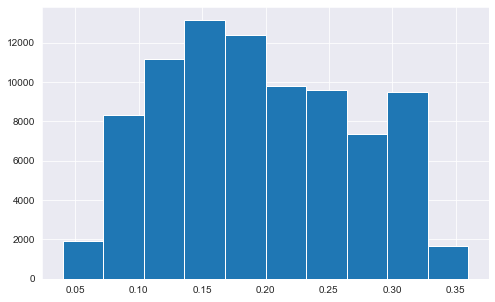

In [29]:
plt.hist(data=subloandf, x='BorrowerRate');

- the borrowers rate is fairly normally distributed.  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
- the distribution of `statedMonthlyIncome ` is skewed to the right and very large. 
- The majority of borrowers are employed and all other categories as small part of borrowers
- most of the loans in the data set are actually current loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
I created new dataframe which contains new `LoanStatus` which consist of only  completed and defaulted.
Since the feature of interest thus `LoanStatus` initiallly shown that most loan status were current and my main goal is to fine the borrowers who completes or defaults their loans.

## Bivariate Exploration

### Relationship between `LoanStatus` and `ProsperRating (Alpha)` variables

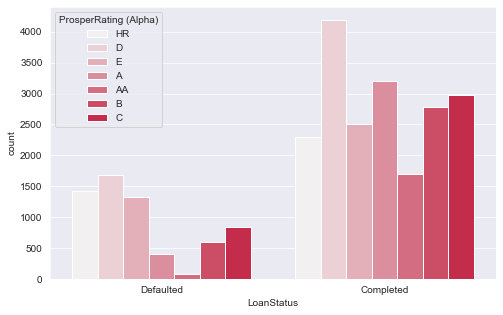

In [30]:
sb.countplot(data = defaulted_df, x ='LoanStatus', hue = 'ProsperRating (Alpha)', color='crimson');

- The rating `D` has the most defaulted loans and also the most completed loans
- And the second highest is `A` and so on.

### Average Investors for Prosper Rating

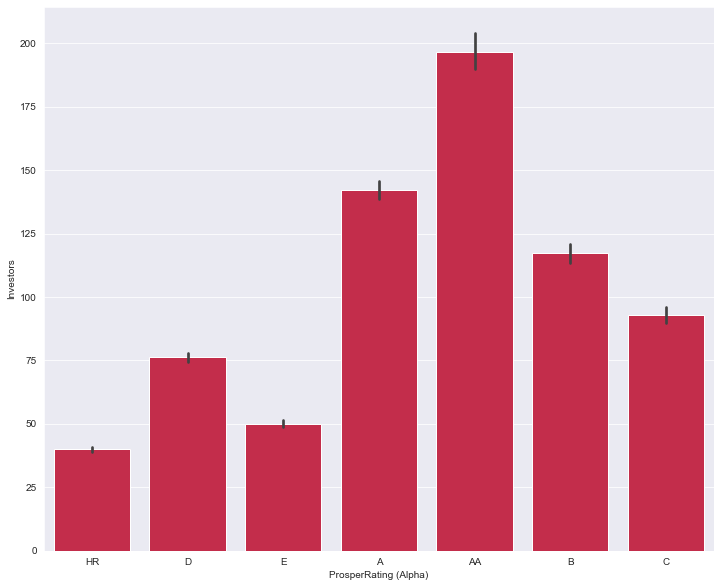

In [31]:
plt.figure(figsize = [12, 10])
sb.barplot(data = defaulted_df, x = 'ProsperRating (Alpha)', y = 'Investors', color = 'crimson');

- the Proper rating `AA` has the highest average of investors

### Average Monthly Income for Loan Status

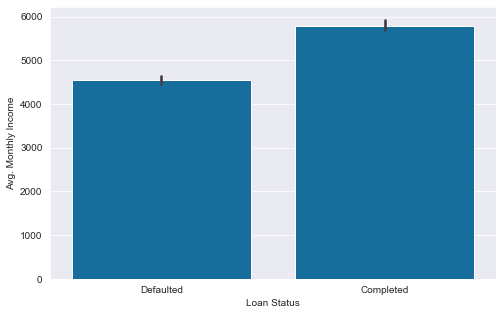

In [32]:
sb.barplot(data=defaulted_df, x='LoanStatus', y='StatedMonthlyIncome', color=base_color);
plt.xlabel('Loan Status');
plt.ylabel('Avg. Monthly Income');

- Completed loan status is associated the highest average monthly income.

### How does the Loan Amount  distribution vary by Employment Status?

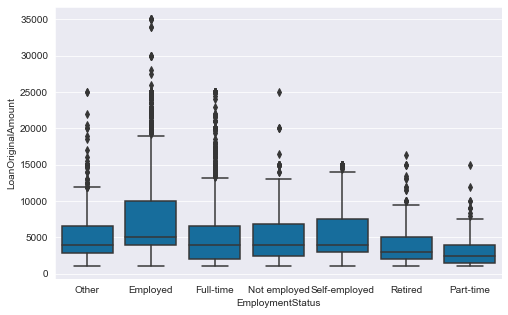

In [33]:
sb.boxplot(data = defaulted_df, x = 'EmploymentStatus', y = 'LoanOriginalAmount', color=base_color);

- the Employed borrowers have the higher loan amount, followed by the Self-employed.
- also the part-time borrowers have the least loan amount

### How does the Loan Amount distribution vary by Loan Status?

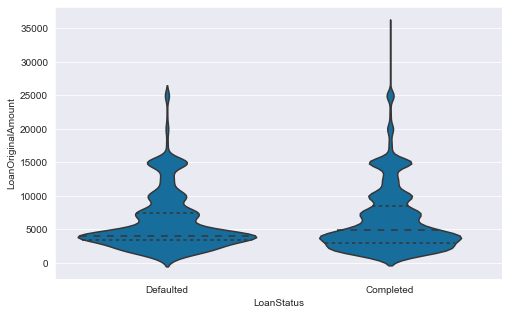

In [34]:
sb.violinplot(data = defaulted_df, x = 'LoanStatus', y = 'LoanOriginalAmount', color=base_color, inner='quartile');

- Loan Amount for both the defaulted and completed loan status spans around an amount of 5000 but defaulted tend to have smaller range of amount than completed. 

In [38]:
# Use group_by() and size() to get the number of employment status and each combination of the two variable levels as a pandas Series
counts = defaulted_df.groupby(['EmploymentStatus', 'LoanStatus']).size()

In [39]:
# Use Series.reset_index() to convert a series into a dataframe object
counts = counts.reset_index(name='count')

In [40]:
counts = counts.pivot(index = 'EmploymentStatus', columns = 'LoanStatus', values = 'count')

In [41]:
counts

LoanStatus,Completed,Defaulted
EmploymentStatus,,
Employed,12320,4159
Full-time,5413,1117
Not employed,212,163
Other,449,349
Part-time,186,38
Retired,195,74
Self-employed,889,441


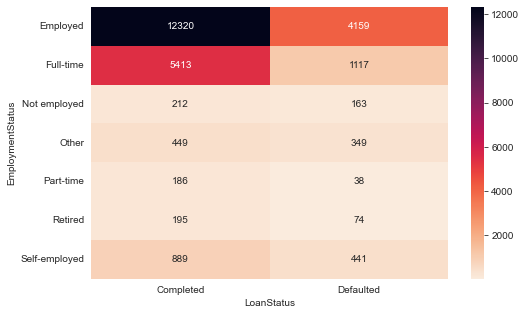

In [42]:
# plotting a heat map chart
sb.heatmap(counts, annot = True, fmt = 'd', cmap='rocket_r');

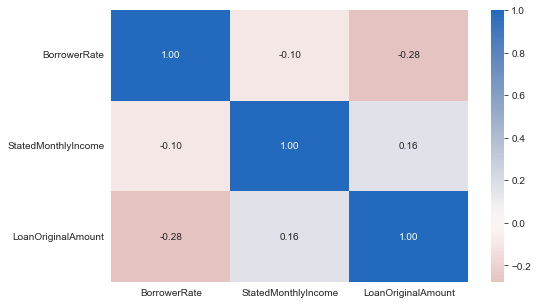

In [43]:
sb.heatmap(defaulted_df[['BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount']].corr(), annot = True, fmt = '.2f', 
           cmap = 'vlag_r', center = 0);

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- In Loan status vs Loan amount defaulted credits tend to be smaller than completed credits onces. 
- Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'. 
- Also, the Completed loan status is associated with borrowers with higher average monthly income.


## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- the Proper rating `AA` attracted the highest average of investors

## Multivariate Exploration

### How does the average Loan amount vary for Employement status between Defaulted and Completed loans?

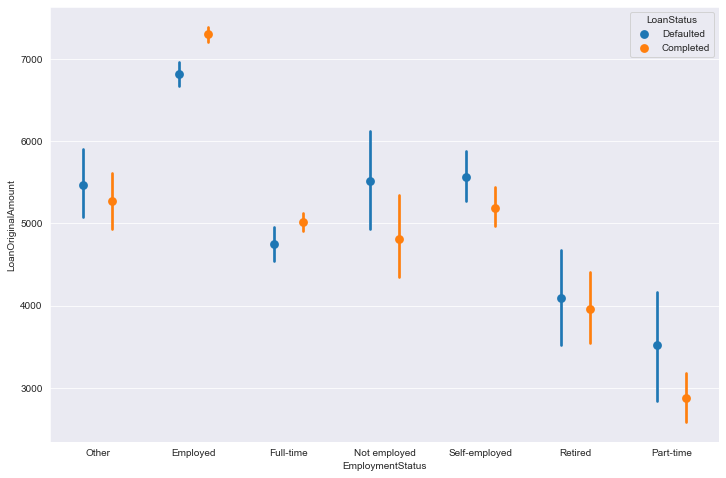

In [35]:
plt.figure(figsize = [12, 8])
sb.pointplot(data=defaulted_df, x='EmploymentStatus', y='LoanOriginalAmount', hue='LoanStatus', dodge=0.3, linestyles="");

- loan amount associted with the defaulted loan staus tend to be higher for employment status `other`, `Not employed`, `Retired` and `Part-time` than that of the completed except for the employment status `Employed` and `Full-time`


### Average Loan Amount varing in term of  Proper rating for each Loan Status

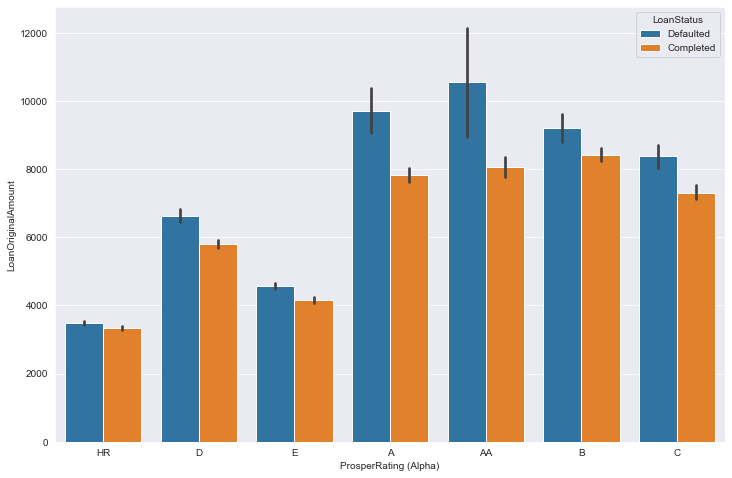

In [36]:
plt.figure(figsize = [12, 8])
sb.barplot(data=defaulted_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');

- the average loan amount for defaulted loan status tends to larger than that of completed in term of Prosper Ratings.
- Most of the defaulted comes from borrwers with Prosper rating `AA`.

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- Most of the defaulted comes from borrowers with Prosper rating `AA` strengthened the factors that drive default loans.

## Were there any interesting or surprising interactions between features?
- Interesting find was that loan amount for defaulted associated with employment status `other`, `Not employed`, `Retired` and `Part-time`tend to be larger than that of completed.